# No-Show Medical Appointments Analysis  
**Brazil 2016 - 110,527 appointments**  
**Goal:** Identify factors that predict whether patients show up (No-show = Yes)  
**Submitted by:** Jerad Williams - 2/24/2026

In [29]:
!pip install matplotlib seaborn

In [30]:
!ls

airflow
Applications
dbt_healthcare
Desktop
Documents
Downloads
healthcare-patient-analytics-pipeline
healthcare-venv
Library
linkedin photo.jpeg
Movies
Music
NoShow_Analysis_Final.ipynb
noshowappointments-kagglev2-may-2016.csv
Pictures
Public


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print('Shape:', df.shape)
df.head()

Shape: (110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
df = df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'NoShow'})
df['NoShow'] = (df['NoShow'] == 'Yes').astype(int)

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['WaitDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['AgeGroup'] = pd.cut(df['Age'], bins=[-1,18,35,55,120], labels=['Child','Young','Middle','Senior'])
df['HasChronic'] = ((df['Hypertension'] + df['Diabetes']) > 0).astype(int)

print('Overall no-show rate: {:.1%}'.format(df['NoShow'].mean()))

Overall no-show rate: 20.2%


## Research Questions
1. How do **SMS**, **AgeGroup**, and **WaitDays** interact?  
2. Does **Scholarship** interact with **Age** and **Chronic conditions**?  
3. Which **Neighbourhoods** have highest risk?

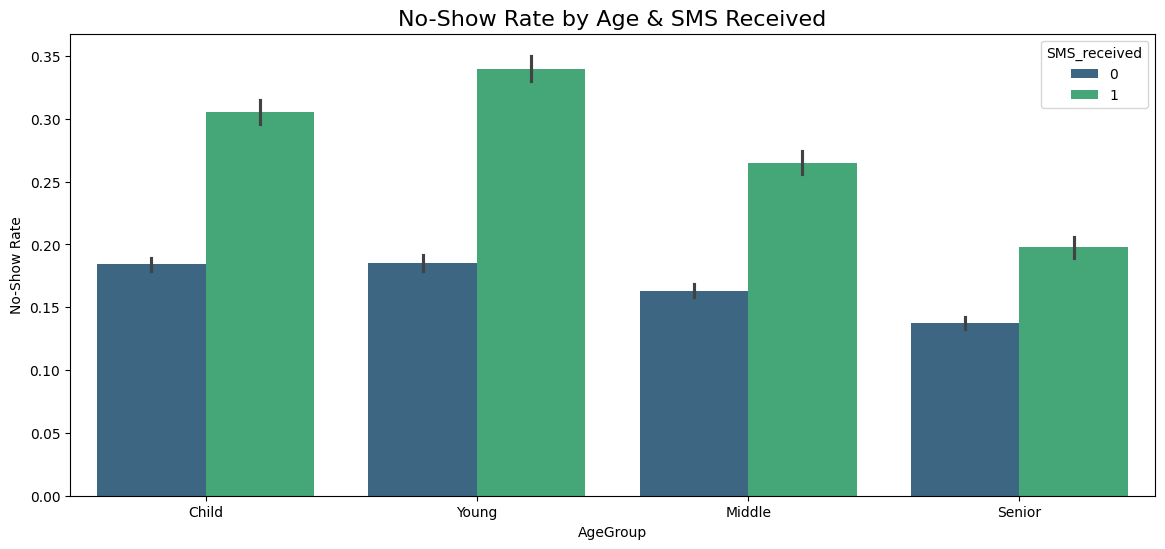

In [33]:
df['WaitGroup'] = pd.cut(df['WaitDays'], bins=[-1,0,7,30,180], labels=['Same-day','1-7d','8-30d','>30d'])

plt.figure(figsize=(14,6))
sns.barplot(data=df, x='AgeGroup', y='NoShow', hue='SMS_received', palette='viridis')
plt.title('No-Show Rate by Age & SMS Received', fontsize=16)
plt.ylabel('No-Show Rate')
plt.show()

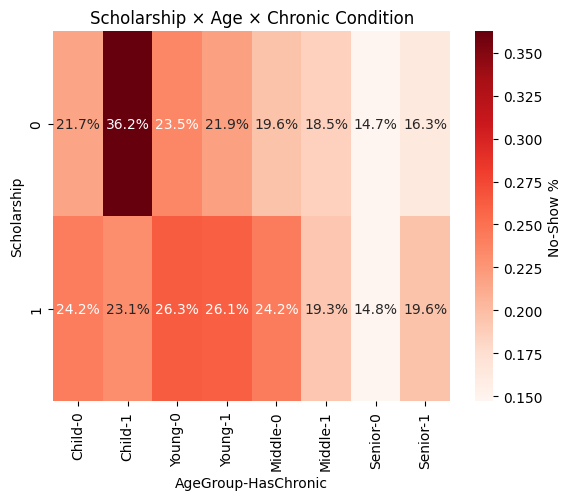

In [34]:
pivot = df.pivot_table('NoShow', index='Scholarship', columns=['AgeGroup','HasChronic'], aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.1%', cmap='Reds', cbar_kws={'label': 'No-Show %'})
plt.title('Scholarship × Age × Chronic Condition')
plt.show()

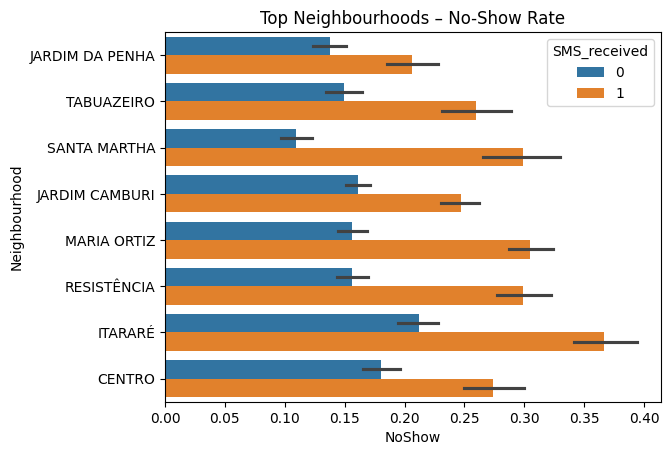

In [35]:
top_n = df['Neighbourhood'].value_counts().head(8).index
top_df = df[df['Neighbourhood'].isin(top_n)]
sns.barplot(data=top_df, y='Neighbourhood', x='NoShow', hue='SMS_received')
plt.title('Top Neighbourhoods – No-Show Rate')
plt.show()

## Key Findings & Recommendations
• **Strongest factor:** Wait time >30 days → 30%+ no-show  
• **Highest risk:** Young adults (15-35) with long waits + no SMS (34%)  
• **SMS helps** long-wait patients but is sent to higher-risk groups  
• Scholarship patients show up less, especially young & healthy  
• Neighbourhoods vary widely → target high-risk areas first  

**Dependent variable:** NoShow  
**Independent variables:** SMS_received, Age, WaitDays, Scholarship, HasChronic, Neighbourhood